In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
import matplotlib
import mglearn
import os

from preamble import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from matplotlib.pyplot import rc
rc('font',family='New Gulim') #plot 한글폰트 적용

cancer = load_breast_cancer()

## 3.4 차원 축소, 특성 추출, 매니폴드 학습

### 3.4.1 주성분 분석 (PCA)

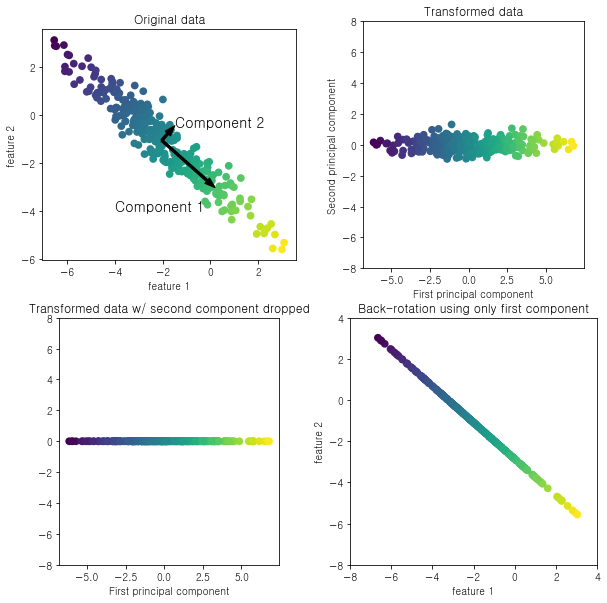

In [2]:
mglearn.plots.plot_pca_illustration()

#### 시각화를 위해 유방암 데이터셋에 PCA 적용하기

- 유방암 데이터의 특성값의 개수는 30개
- 30개의 특성들에 대한 산점도 그래프를 그리면 총 435개의 산점도가 산출됨
$$_{c}C_{2} = {{30!} \over {2!28!}} = {{30 \times 20} \over {2}} = 15 \times 29 = 435$$  
- 이렇게 데이터 특성 개수가 많을 때 (데이터 차원이 높을때) 보다 더 쉽게 특성 데이터들을 시각화 하는 방법
    - 악성(Malignant)와 양성(Benign)에 대해 30개 특성의 히스토그램을 그리는 것

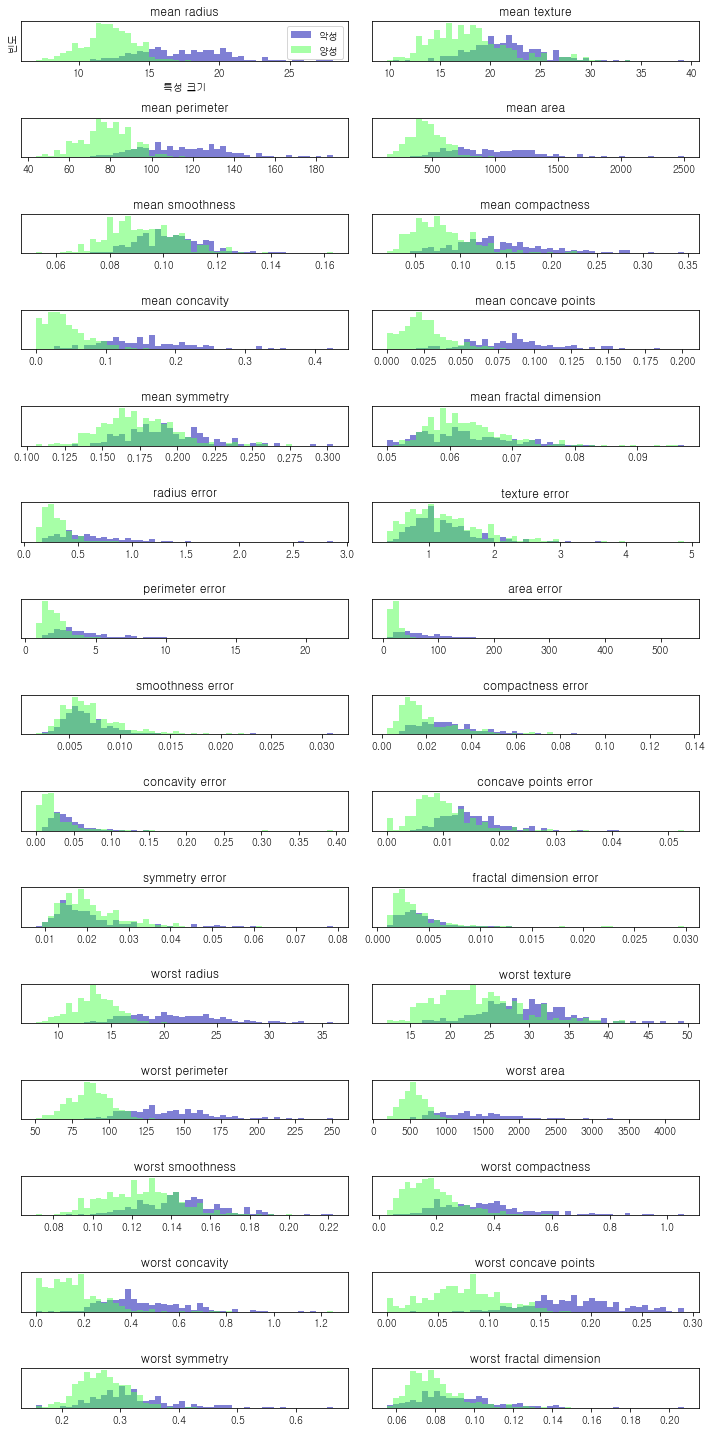

In [6]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0,0.5,'두 번째 주성분')

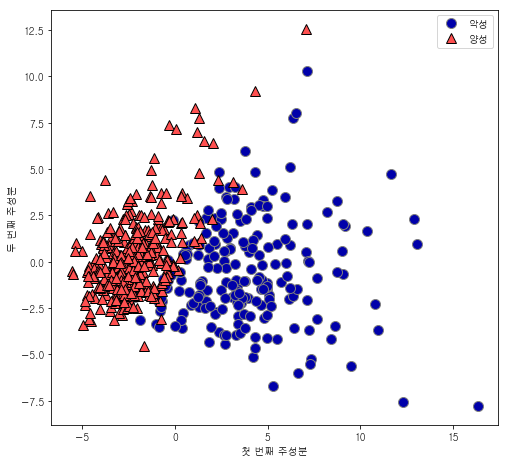

In [12]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [13]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [14]:
print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0,0.5,'주성분')

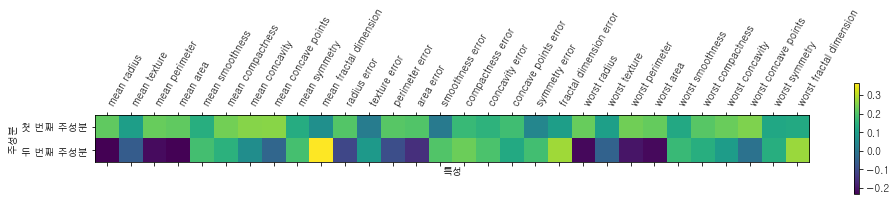

In [15]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

#### 고유얼굴 특성 추출

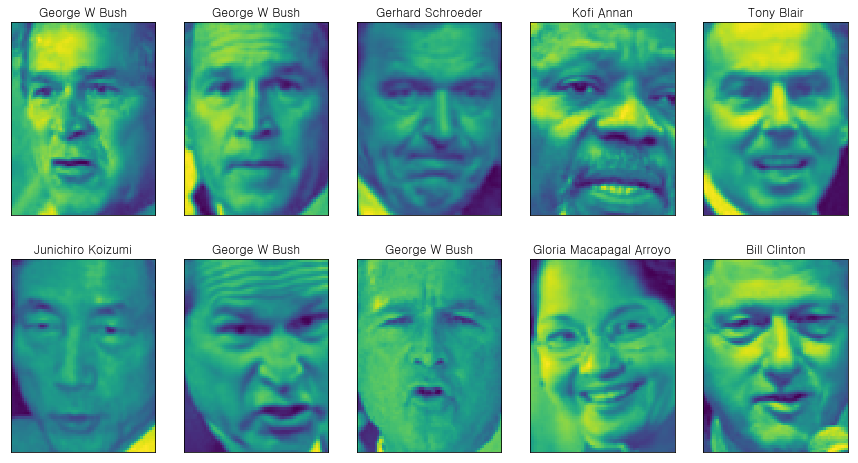

In [15]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [16]:
print("people.images.shape: {}".format(people.images.shape))
print("An image shape: {}".format(people.images[0].shape))
print("Number of classes: {}".format(len(people.target_names)))
print()
print("people.data.shape: {}".format(people.data.shape))
print("people.target.shape: {}".format(people.target.shape))
print()
print("people.target[0]: {}".format(people.target[0]))
print("people.target_names[0]: {}".format(people.target_names[0]))

people.images.shape: (1296, 87, 65)
An image shape: (87, 65)
Number of classes: 16

people.data.shape: (1296, 5655)
people.target.shape: (1296,)

people.target[0]: 4
people.target_names[0]: Alejandro Toledo


In [22]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
print(counts)
print()
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("[{0:2}] {1:23} {2:3}".format(i+1, name, count), end='\n')
    if (i + 1) % 5 == 0:
        print()

[ 39  24  29 121 530 109  44  22  20  60  32  41  33  23  25 144]

[ 1] Alejandro Toledo         39
[ 2] Atal Bihari Vajpayee     24
[ 3] Bill Clinton             29
[ 4] Donald Rumsfeld         121
[ 5] George W Bush           530

[ 6] Gerhard Schroeder       109
[ 7] Gloria Macapagal Arroyo  44
[ 8] Hamid Karzai             22
[ 9] Igor Ivanov              20
[10] Junichiro Koizumi        60

[11] Kofi Annan               32
[12] Lleyton Hewitt           41
[13] Megawati Sukarnoputri    33
[14] Tiger Woods              23
[15] Tom Daschle              25

[16] Tony Blair              144


In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.38


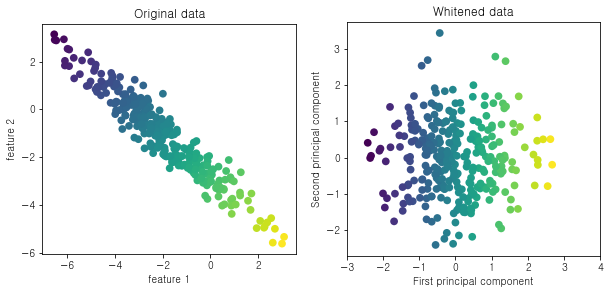

In [25]:
mglearn.plots.plot_pca_whitening()

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (436, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.45


In [29]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


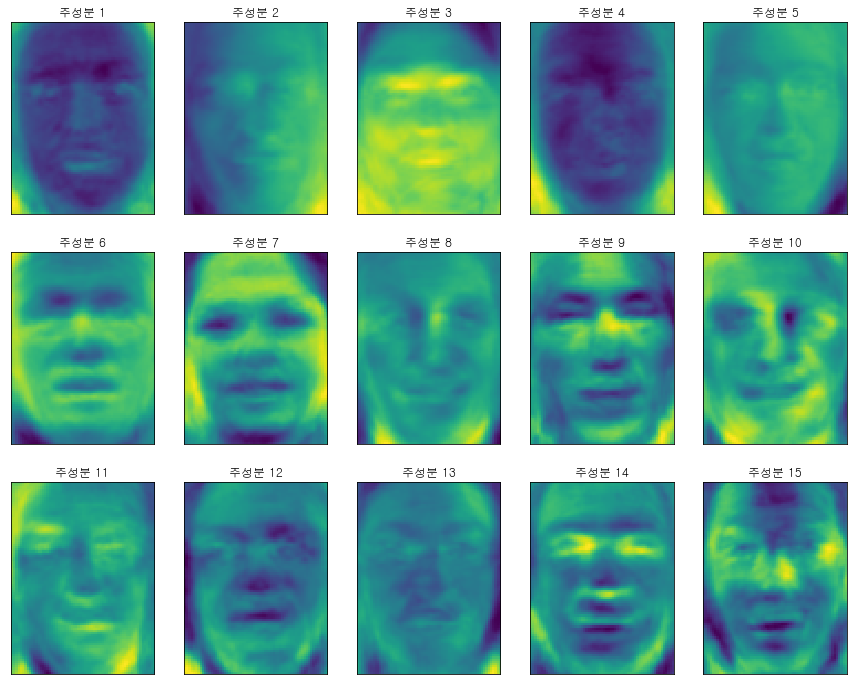

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분 {}".format((i + 1)))

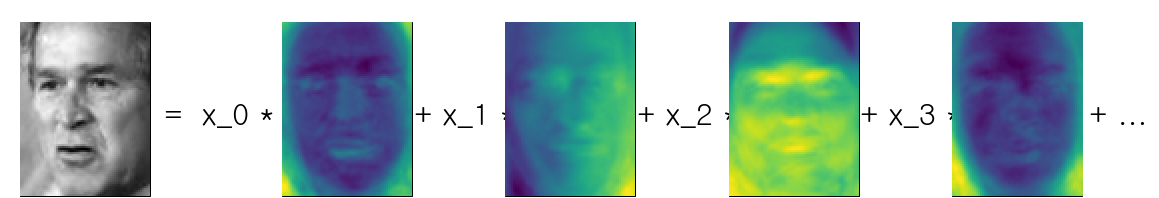

In [31]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.27451 , ..., 0.073203],
       ...,
       [0.377778, ..., 0.282353]], dtype=float32), 
array([[0.216993, ..., 0.128105],
       ...,
       [0.173856, ..., 0.88366 ]], dtype=float32))
________________________________________________________pca_faces - 0.8s, 0.0min


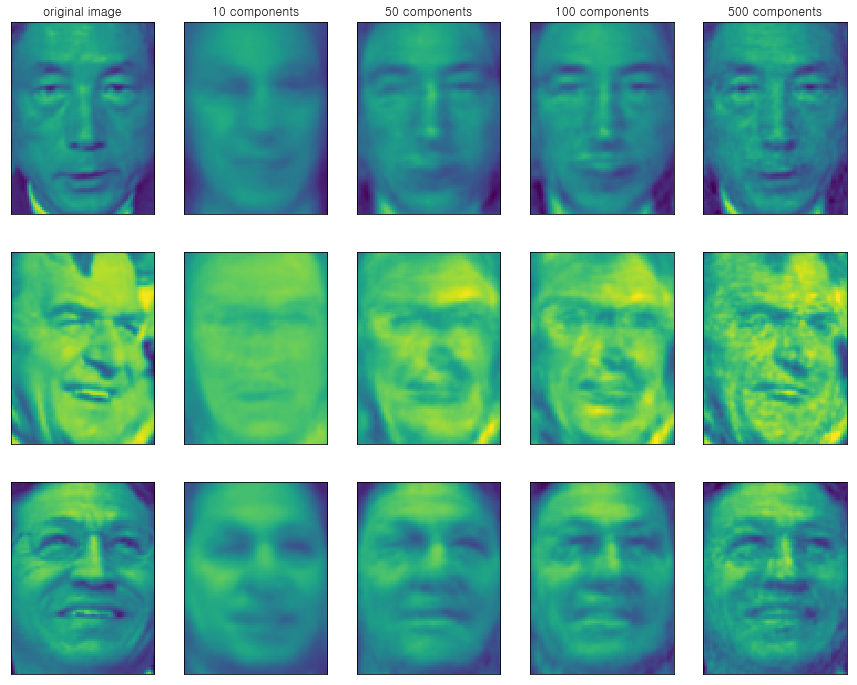

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0,0.5,'두 번째 주성분')

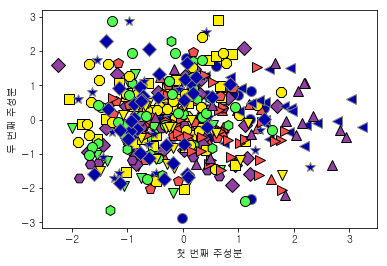

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")